In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

In [3]:
kc_data = pd.read_csv("/Users/selinwork/Documents/Ironhack/Ironhack_Week_5/Project_IronKaggle/king_ country_ houses_aa.csv")

In [ ]:
kc_data.sample(10)

In [5]:
kc_data.shape

(21613, 21)

In [ ]:
kc_data.info()

In [7]:
kc_data.columns = kc_data.columns.str.lower().str.replace(' ', '_')

In [8]:
df = kc_data.copy()

In [ ]:
df.dtypes

In [10]:
df["price"] = df["price"].astype(int)
df["bathrooms"] = df["bathrooms"].astype(int)
df["floors"] = df["floors"].astype(int)


In [ ]:
print(df["price"].unique())

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum() 
df.eq(" ").sum()  

In [ ]:
df.nunique()

In [ ]:
df.describe().T

In [16]:
df["price"].median()

450000.0

In [ ]:

# Ensure 'date' is in datetime format
df["date"] = pd.to_datetime(df["date"], errors='coerce')

# Create 'year_month' column as a numerical format
df['year_month'] = df['date'].dt.year * 100 + df['date'].dt.month

# Drop the original 'date' column
df = df.drop(columns=['date'])

df.head()





In [18]:
df.rename(columns={'year_month': 'date'}, inplace=True)
df.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
0,7129300520,221900,3,1,1180,5650,1,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,201410
1,6414100192,538000,3,2,2570,7242,2,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,201412


<Axes: xlabel='price', ylabel='Count'>

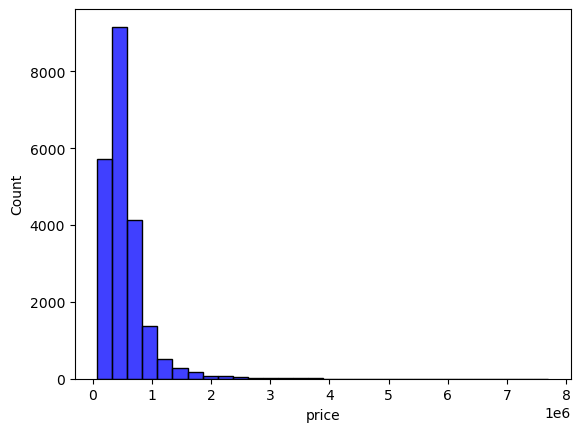

In [21]:
color = 'blue'  # Define the color variable
sns.histplot(df["price"], color=color, bins=30, edgecolor='black')

In [ ]:
df.corrwith(df["price"]).sort_values(ascending=False)

In [ ]:
target = df.pop("price")

In [ ]:
df["price"] = target

In [ ]:
df

In [ ]:
ml_df = df.copy()

In [ ]:
# I dropped the Id columns due to their irrelevance in the model
ml_df = df.drop(["id"], axis=1)

In [ ]:
# I have generated a new column called price_per_sqft which is the price of the house divided by the square footage of the living area.To train better.
ml_df['price_per_sqft'] = round(ml_df['price'] / ml_df['sqft_living'], 2)


In [ ]:
# I moved my target (price) to the last column
target = ml_df.pop("price")
ml_df["price"] = target
ml_df.head()

In [ ]:
ml_df["zipcode"].value_counts()


In [ ]:
X = ml_df.drop(["price","price_per_sqft"], axis=1)
y = ml_df["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'100% of our data is : {len(ml_df)}.')
print(f'70% for training data is: {len(X_train)}.')
print(f'30% for test data is: {len(X_test)}.')

100% of our data is : 21613.
70% for training data is: 15129.
30% for test data is: 6484.


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = lin_reg.predict(X_test)

In [ ]:
comparison = pd.DataFrame({"Actual": y_test, "Predicted": predictions})
comparison['Predicted'] = comparison['Predicted'].astype(int)
comparison.head(10)

,Actual,Predicted
735,365000,457387
2830,865000,772680
4106,1038000,1225213
16218,1490000,1687001
19964,711000,722910
1227,211000,289969
18849,790000,818832
19369,680000,489713
20164,384500,373645
7139,605000,474202


In [ ]:
comparison["Difference"] = abs(comparison["Actual"] - comparison["Predicted"])
comparison = comparison.reset_index().rename(columns={'index': 'ID'})
comparison[['Actual', 'Predicted', 'Difference']].head(10)

,Actual,Predicted,Difference
0,365000,457387,92387
1,865000,772680,92320
2,1038000,1225213,187213
3,1490000,1687001,197001
4,711000,722910,11910
5,211000,289969,78969
6,790000,818832,28832
7,680000,489713,190287
8,384500,373645,10855
9,605000,474202,130798


In [ ]:
r2_3 = r2_score(y_test, predictions)
RMSE_3 = root_mean_squared_error(y_test, predictions)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

print("R2 = ", round(r2_3, 2))
print("RMSE = ", round(RMSE_3, 2))
print("MSE =  ", round(MSE_3, 2)) 
print("MAE = ", round(MAE_3, 2))

R2 =  0.7
RMSE =  207444.24
MSE =   43033112947.73
MAE =  127213.7


In [ ]:
%pip install xgboost

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

Note: you may need to restart the kernel to use updated packages.


Ridge()

In [ ]:
pred_ridge = ridge_reg.predict(X_test)

In [ ]:
r2_4 = r2_score(y_test, pred_ridge)
RMSE_4 = root_mean_squared_error(y_test, pred_ridge)
MSE_4 = mean_squared_error(y_test, pred_ridge)
MAE_4 = mean_absolute_error(y_test, pred_ridge)

print("R2 = ", round(r2_3, 2))
print("RMSE = ", round(RMSE_4, 2))
print("MSE =  ", round(MSE_4, 2)) 
print("MAE = ", round(MAE_4, 2))

R2 =  0.7
RMSE =  207476.86
MSE =   43046646074.21
MAE =  127207.25


In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [ ]:
pred_lasso = lasso.predict(X_test)

In [ ]:
r2_5 = r2_score(y_test, pred_lasso)
RMSE_5 = root_mean_squared_error(y_test, pred_lasso)
MSE_5 = mean_squared_error(y_test, pred_lasso)
MAE_5 = mean_absolute_error(y_test, pred_lasso)

print("R2 = ", round(r2_5, 4))
print("RMSE = ", round(RMSE_5, 4))
print("The value of the metric MSE is ", round(MSE_5, 4))
print("MAE = ", round(MAE_5, 4))

R2 =  0.7019
RMSE =  207445.3687
The value of the metric MSE is  43033581000.4846
MAE =  127213.24


In [ ]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
pred_tree = tree.predict(X_test)

In [ ]:
r2_6 = r2_score(y_test, pred_tree)
RMSE_6 = root_mean_squared_error(y_test, pred_tree)
MSE_6 = mean_squared_error(y_test, pred_tree)
MAE_6 = mean_absolute_error(y_test, pred_tree)

print("R2 = ", round(r2_6, 4))
print("RMSE = ", round(RMSE_6, 4))
print("The value of the metric MSE is ", round(MSE_6, 4))
print("MAE = ", round(MAE_6, 4))

R2 =  0.7426
RMSE =  192786.2527
The value of the metric MSE is  37166539248.0068
MAE =  100649.079


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
pred_knn = knn.predict(X_test)

In [ ]:
r2_7 = r2_score(y_test, pred_knn)
RMSE_7 = root_mean_squared_error(y_test, pred_knn)
MSE_7 = mean_squared_error(y_test, pred_knn)
MAE_7 = mean_absolute_error(y_test, pred_knn)

print("R2 = ", round(r2_7, 4))
print("RMSE = ", round(RMSE_7, 4))
print("The value of the metric MSE is ", round(MSE_7, 4))
print("MAE = ", round(MAE_7, 4))

R2 =  0.4931
RMSE =  270510.9263
The value of the metric MSE is  73176161233.7844
MAE =  165033.4007


In [ ]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred_xgb = xgbr.predict(X_test)

In [ ]:
r2_8 = r2_score(y_test, pred_xgb)
RMSE_8 = root_mean_squared_error(y_test, pred_xgb)
MSE_8 = mean_squared_error(y_test, pred_xgb)
MAE_8 = mean_absolute_error(y_test, pred_xgb)

print("R2 = ", round(r2_8, 4))
print("RMSE = ", round(RMSE_8, 4))
print("The value of the metric MSE is ", round(MSE_8, 4))
print("MAE = ", round(MAE_8, 4))

R2 =  0.8842
RMSE =  129315.0179
The value of the metric MSE is  16722373855.3125
MAE =  68314.9065


In [ ]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [r2_3, r2_4, r2_5, r2_6, r2_7, r2_8],
    'RMSE': [RMSE_3, RMSE_4, RMSE_5, RMSE_6, RMSE_7, RMSE_8],
    'MSE': [MSE_3, MSE_4, MSE_5, MSE_6, MSE_7, MSE_8],
    'MAE': [MAE_3, MAE_4, MAE_5, MAE_6, MAE_7, MAE_8]
}

In [ ]:
ml_df_metrics = pd.DataFrame(metrics)
ml_df_metrics.set_index('Model').T

Model,Linear Regression,Ridge,Lasso,Decision Tree,KNN,XGBoost
R²,0.70,0.70,0.70,0.74,0.49,0.88
RMSE,207444.24,207476.86,207445.37,192786.25,270510.93,129315.02
MSE,43033112947.73,43046646074.21,43033581000.48,37166539248.01,73176161233.78,16722373855.31
MAE,127213.70,127207.25,127213.24,100649.08,165033.40,68314.91


I’ll continue with Linear Regression as the baseline model for interpretability and benchmarking, and XGBoost for optimization due to its superior performance and ability to handle non-linear relationships effectively.

Next steps include fine-tuning XGBoost and analyzing feature importance to enhance predictive accuracy.